In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [169]:
#Import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Import and Inspect Data

In [170]:
#Import dataset
df_leads = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lead Scoring Assignment/Leads.csv')
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [171]:
# Checking duplicates in Prospect ID
sum(df_leads.duplicated(subset = 'Prospect ID'))

0

In [172]:
# Checking duplicates for Lead Number
sum(df_leads.duplicated(subset = 'Lead Number'))

0

In [173]:
#both 2 unique column, so drop lead Number
df_leads = df_leads.drop(['Lead Number'],axis=1)

In [174]:
df_leads.shape

(9240, 36)

In [175]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [176]:
df_leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [177]:

#Converting default Select to Null
df_leads.replace('Select', np.nan, inplace=True)

In [178]:
# Checking percentage of Null values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [179]:
# Dropping columns which have more than 70% null values
df = df_leads.drop(df_leads.loc[:,list(100*(df_leads.isnull().sum()/len(df_leads.index))>70)].columns, axis=1)
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [180]:
# Next highest null pct is Lead Quality
df['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

In [181]:
print(df['Lead Quality'].value_counts())

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64


In [182]:
# Assume that if person is not sure, they kept the field blank and so impute the missing values with 'Not Sure'
df['Lead Quality'] = df['Lead Quality'].replace(np.nan, 'Not Sure')
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

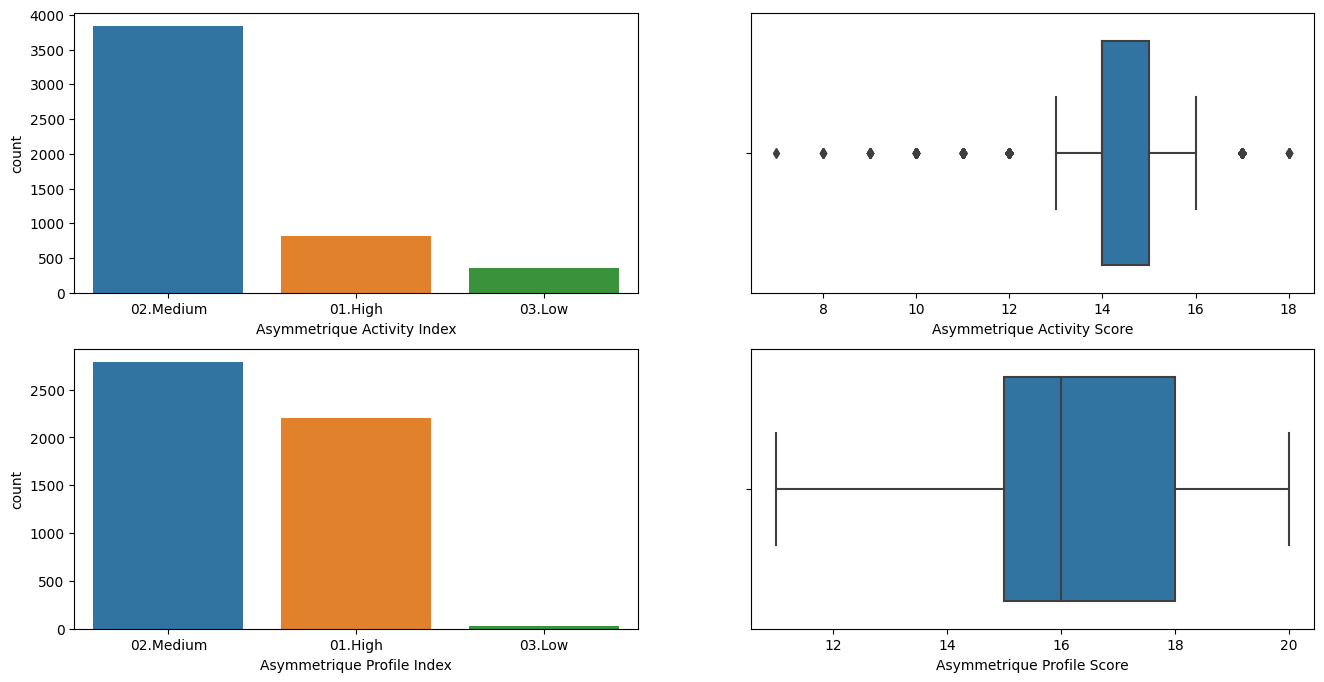

In [183]:
# Next we have to target the below 4 columns
# Asymmetrique Activity Index
# Asymmetrique Profile Index
# Asymmetrique Activity Score
# Asymmetrique Profile Score
# check their distribution
fig, axs = plt.subplots(2,2, figsize = (16,8))
plt1 = sns.countplot(x='Asymmetrique Activity Index',data = df, ax = axs[0,0])
plt2 = sns.boxplot(x = 'Asymmetrique Activity Score',data = df, ax = axs[0,1])
plt3 = sns.countplot(x = 'Asymmetrique Profile Index',data = df, ax = axs[1,0])
plt4 = sns.boxplot(x = 'Asymmetrique Profile Score',data = df, ax = axs[1,1])
plt.show()

In [184]:
# Due to large spread of the data, it is difficult to impute the fields with any specific value
df = df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score','Tags','Lead Quality'],axis=1)
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


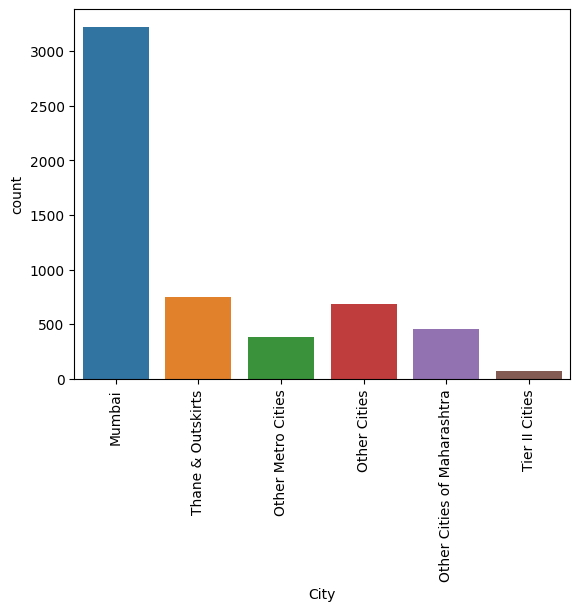

In [185]:
# Next Highest Null value is in City Column
print(df['City'].value_counts())
sns.countplot(x='City', data = df)
plt.xticks(rotation = 90)
plt.show()

In [186]:
#imputing with 'Other cities', more than 50%
df['City'] = df['City'].replace(np.nan,'Other Cities')
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64


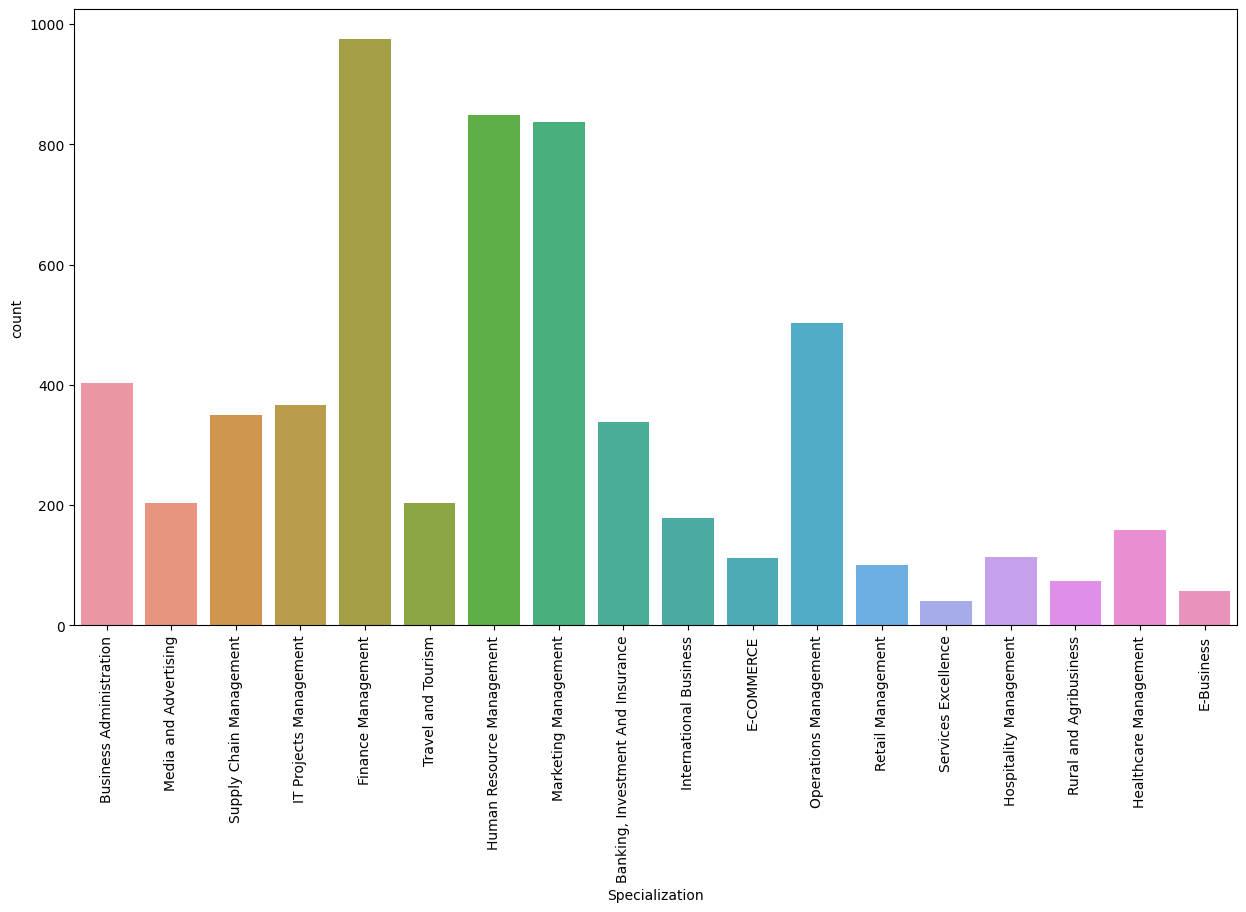

In [187]:
# Next highest null value left is Specialization
print(df['Specialization'].value_counts())
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x='Specialization',data=df)
plt.xticks(rotation = 90)
plt.show()

In [188]:
# 36% of the users have not selected any value for specialization
# impute the Nulls in this column with Other and that can also be used as an analysis point.
df['Specialization'] = df['Specialization'].replace(np.nan, 'Other Specialization')
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [189]:
df_leads.shape

(9240, 36)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


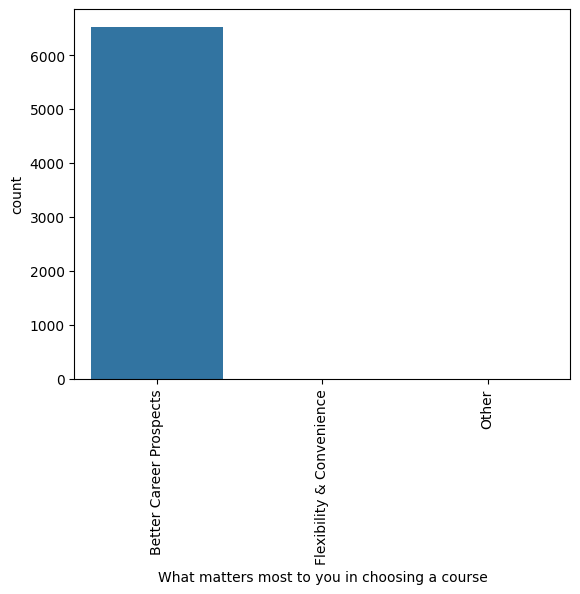

In [190]:
# Next highest null value is in What matters most to you in choosing a course
print(df['What matters most to you in choosing a course'].value_counts())
sns.countplot(x= 'What matters most to you in choosing a course', data = df)
plt.xticks(rotation = 90)
plt.show()

In [191]:
# Impute missing values with Better Career Prospects
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, df['What matters most to you in choosing a course'].mode()[0])
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


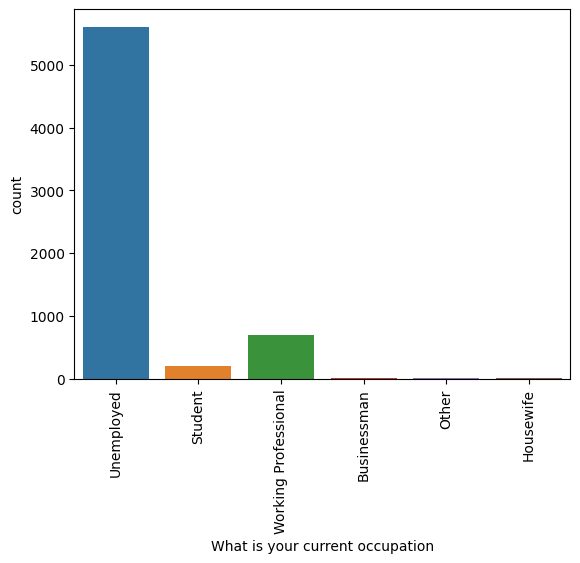

In [192]:
# Next highest null value: What is your current occupation
print(df['What is your current occupation'].value_counts())
sns.countplot(x = 'What is your current occupation', data = df)
plt.xticks(rotation = 90)
plt.show()

In [193]:
#imputing the Null values in Current Occupation with Unemployed
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, df['What is your current occupation'].mode()[0])
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

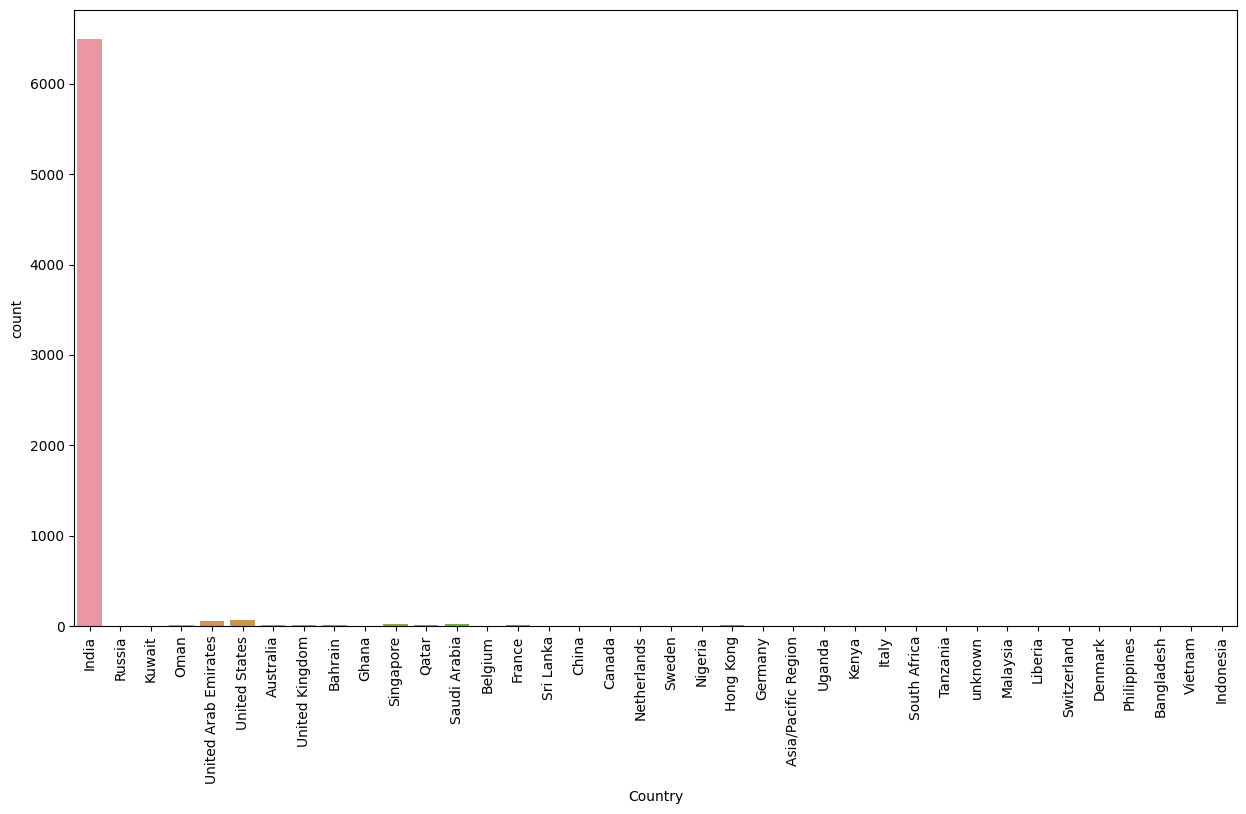

In [194]:
# Next highest null value: country
print(df['Country'].value_counts())
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x= 'Country', data = df)
plt.xticks(rotation = 90)
plt.show()

In [195]:
# We impute the null values with the most frequent value
df['Country'] = df['Country'].replace(np.nan, df['Country'].mode()[0])
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [196]:
df.shape

(9240, 28)

In [197]:
#Rest all the columns have less than 2% null values, so that remove those rows
df_cleaned = df.dropna()
round(100*(df_cleaned.isnull().sum()/len(df_cleaned.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [198]:
df_cleaned.shape

(9074, 28)

In [199]:
(9074/9240)*100

98.2034632034632

We are left with 98.2% of the rows.

In [200]:
df_cleaned.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,Other Cities,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,Other Cities,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,Mumbai,No,No,Modified


In [201]:
del df
df = df_cleaned

#2. EDA

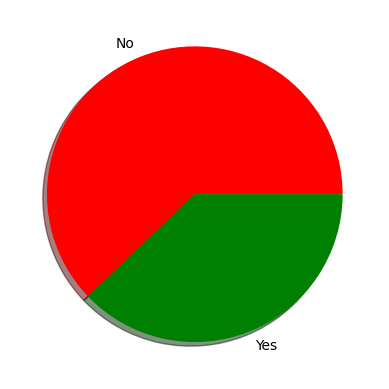

In [202]:
plt.pie(df['Converted'].value_counts(),labels=['No','Yes'], colors=['Red','Green'],shadow=True)
plt.show()

It is not a hugely imbalanced data

In [203]:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
print('Percentage of conversion: ',round(Converted,2),'%')

Percentage of conversion:  37.86 %


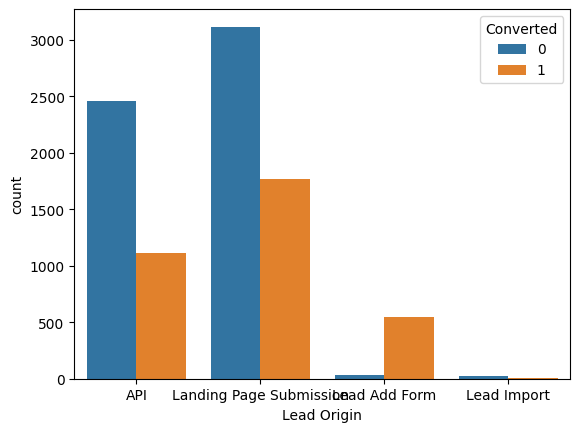

In [204]:
# Plotting for Lead Origin
sns.countplot(x='Lead Origin', hue='Converted', data=df)
plt.show()

1. API has lower Leads but comparitively higher conversion in percentage terms.
2. Landing Page Submission has the maximum leads but in percentage terms, the conversions are lower.
3. Lead Add Form has negligible number of Leads.

To improve overall conversion with respect to Lead Origin, we have to increase the number of API Leads and bettr the conversion rates of Landing Page Submission Leads.

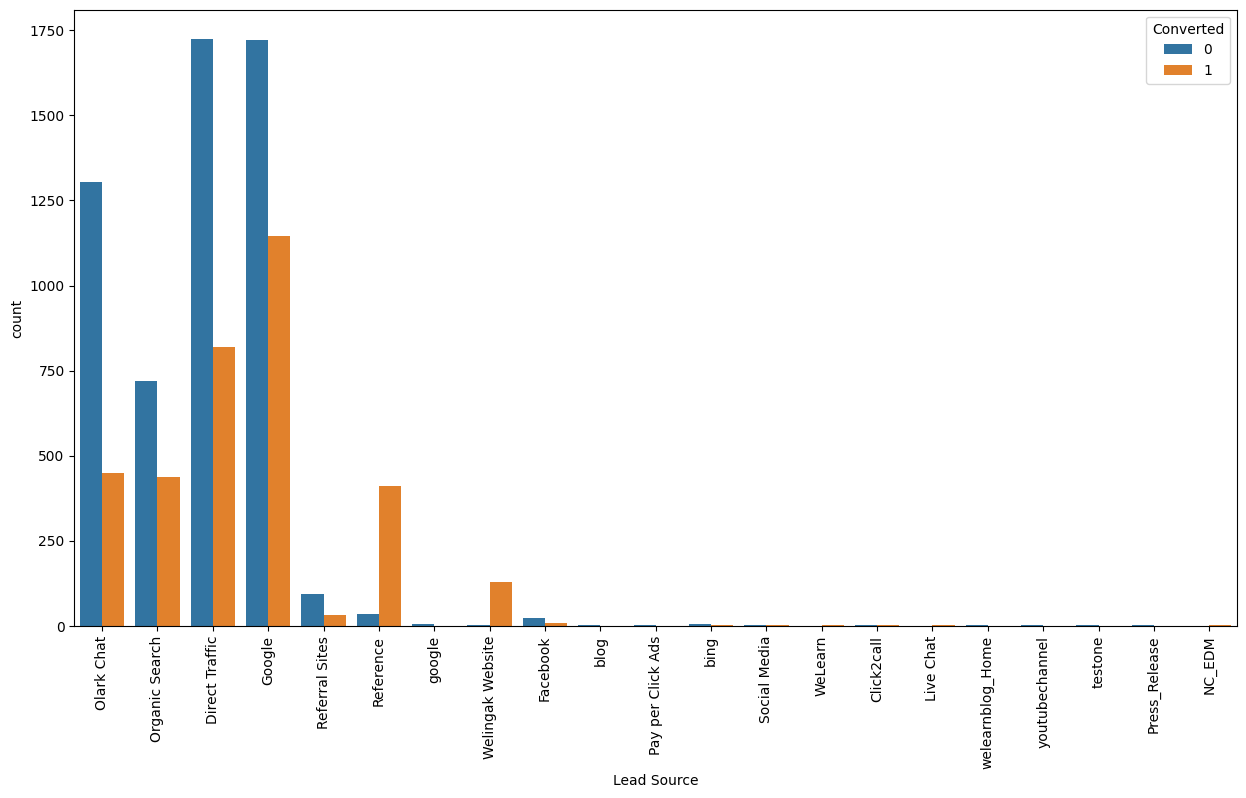

In [205]:
# Checking for Lead SOurce
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = df)
plt.xticks(rotation = 90)
plt.show()

Since all catergories other than Direct Traffic, Google and Organic Search has very minimal data points, we merge all the other categories as 'Other' to reduce the number of categories, that would help us simplify the soluton for the business.

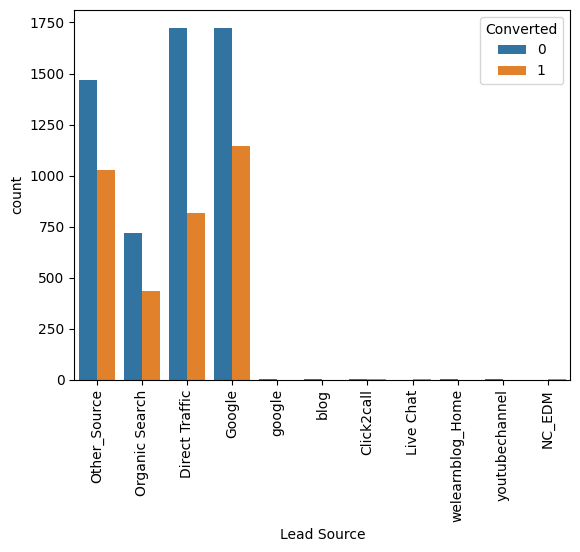

In [206]:
df['Lead Source'] = df['Lead Source'].replace(['Olark Chat','Referral Sites','Pay per Click Ads','bing','Reference','WeLearn',
                                               'Welingak Website','testone','Facebook','Press_Release','Social Media'],'Other_Source')

sns.countplot(x = 'Lead Source', hue = 'Converted', data = df)
plt.xticks(rotation = 90)
plt.show()

1. Direct Traffic and Google generates maximum number of Leads
2. Conversion rates of all other sources combined is higher but they are in very small numbers
3. The conversion rates of direct traffic needs to be improved using strategies like promotional discounts on direct traffic

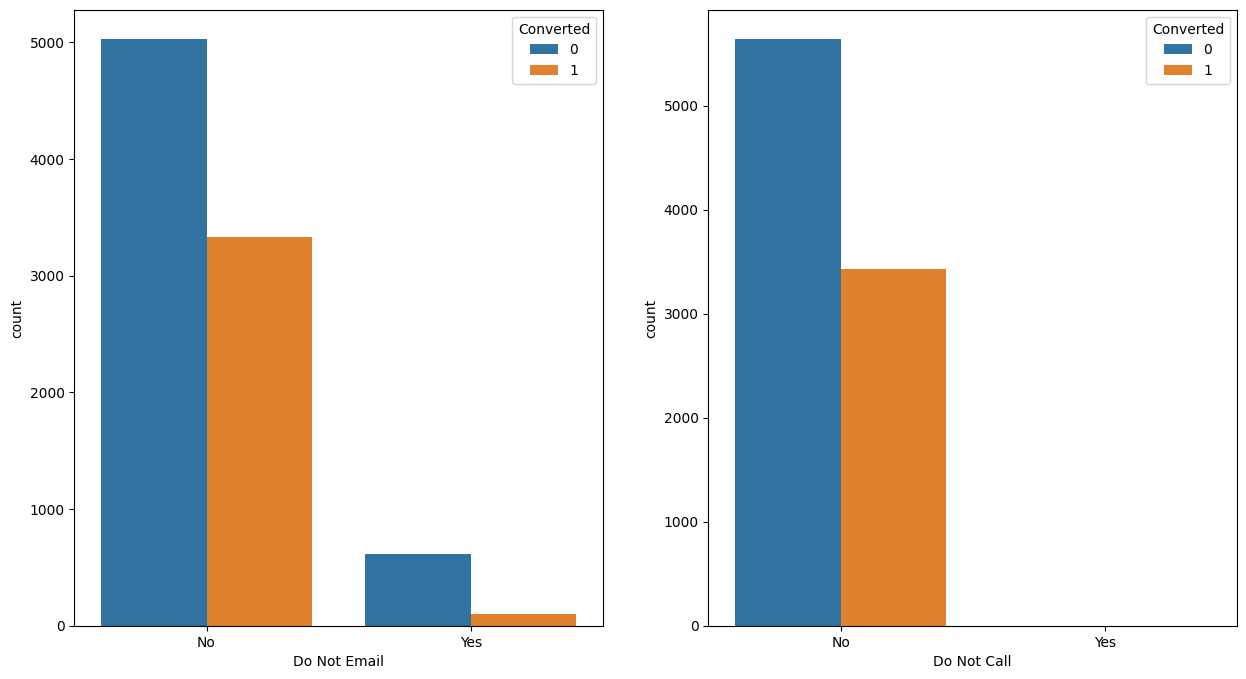

In [207]:
# Checking do not email and do not call
fig, axs = plt.subplots(1,2,figsize = (15,8))
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = df, ax = axs[0])
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = df, ax = axs[1])
plt.show()

1. People who opt for Do not Email, mostly does not convert since it is already implied that they do not want to be contacted further.
2. People who does not opt for any of these DND choices have almost equal chance of converting and not converting.

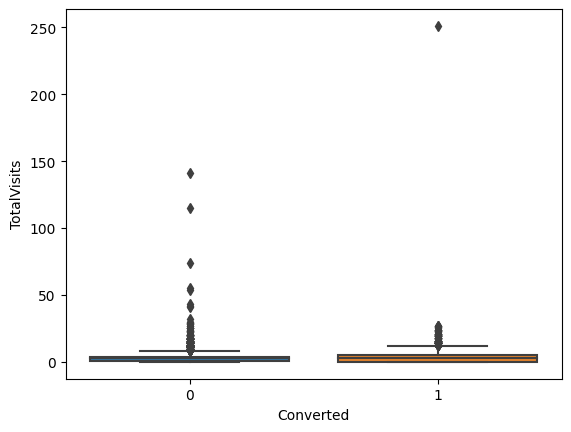

In [208]:
# Checking the next column, Total Visits
sns.boxplot(y='TotalVisits',x='Converted',data=df)
plt.show()

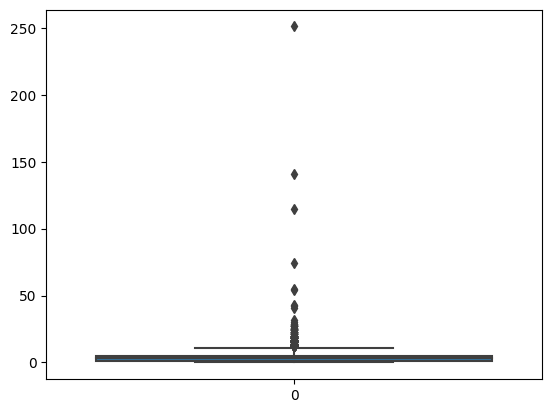

In [209]:
#There seems to be a few outlier, plotting a boxplot of the full data to get a better view
sns.boxplot(df['TotalVisits'])
plt.show()

In [210]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [211]:
# There are a number of outliers as we can see from the boxplot, so we can the outliers to their 99th percentile
perc = df['TotalVisits'].quantile([0,0.95]).values
df['TotalVisits'][df['TotalVisits'] >= perc[1]] = perc[1]

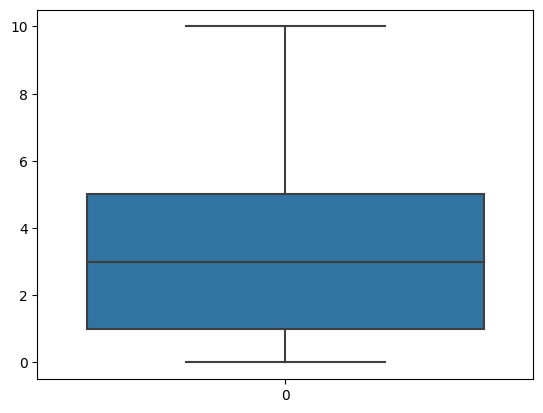

In [212]:
sns.boxplot(df['TotalVisits'])
plt.show()

All outliers in Total Visits are now removed.

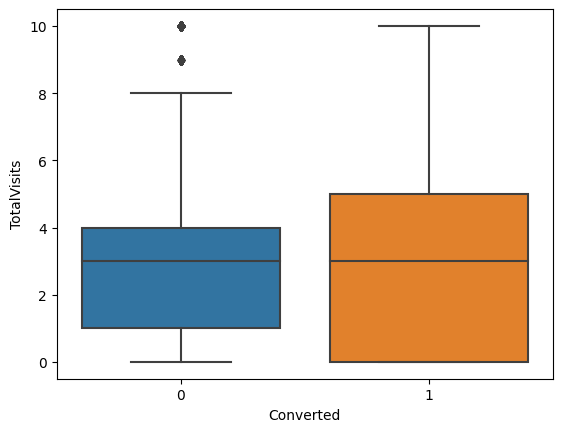

In [213]:
sns.boxplot(y='TotalVisits',x='Converted',data=df)
plt.show()

We cannot draw any inference from Total Visits because both converted and not converted leads have almost similar number of total visits.

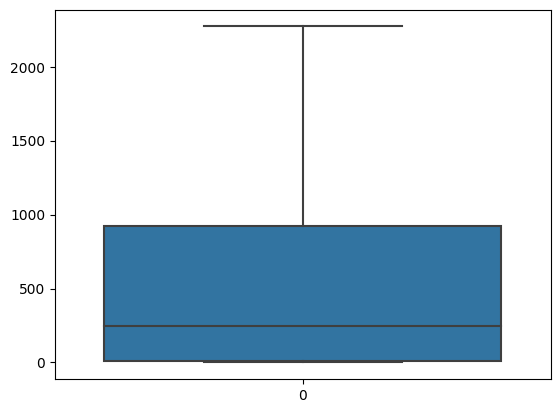

In [214]:
# Checking for next column, Total Time Spent on Website
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

There are no outliers. Let's check the spread for converted and not converted.

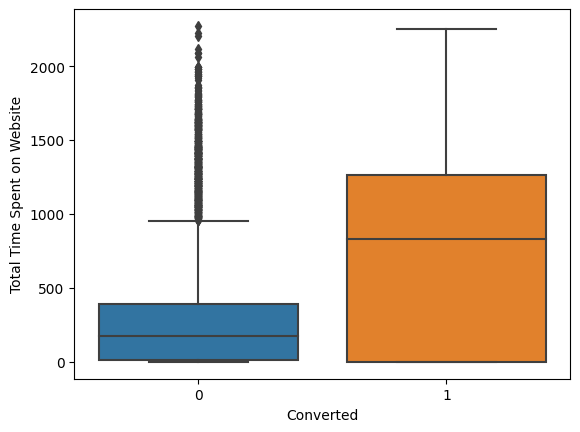

In [215]:
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=df)
plt.show()

Leads who spend more time on the website have higher conversion rates. Sales team must engage these candidates more.

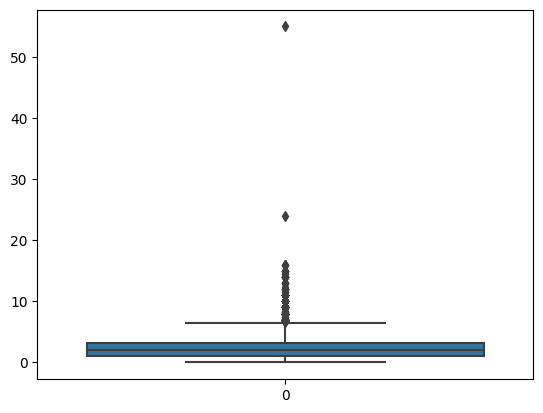

In [216]:
# Now checking page views per visit
sns.boxplot(df['Page Views Per Visit'])
plt.show()

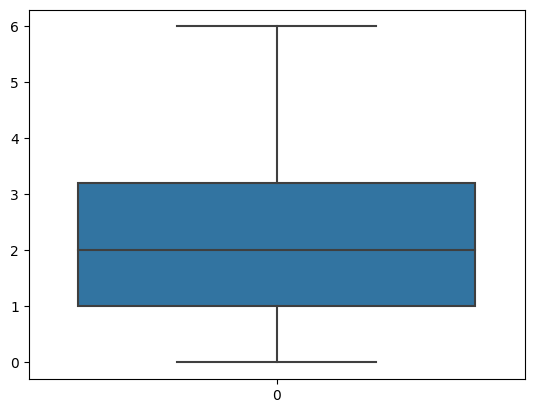

In [217]:
# Since there are many outliers, we can the outliers inside the 95th percentile
perc = df['Page Views Per Visit'].quantile([0,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] >= perc[1]] = perc[1]
sns.boxplot(df['Page Views Per Visit'])
plt.show()

The outliers are now handled. Let's check the spread for converted and not converted.

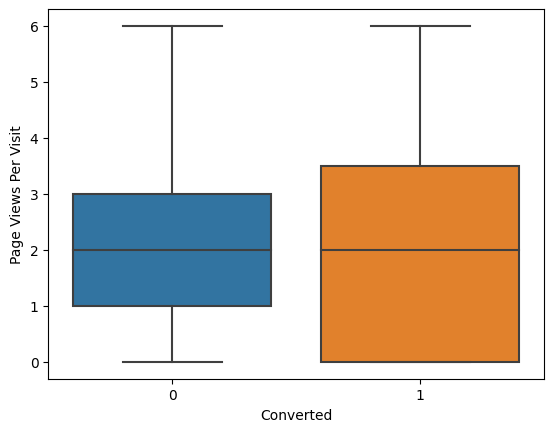

In [218]:
sns.boxplot(y='Page Views Per Visit',x='Converted',data=df)
plt.show()

Both converted and not convered have equal number of page views per visit and we cannot draw any conclusion from the numbr of pages a lead visit.

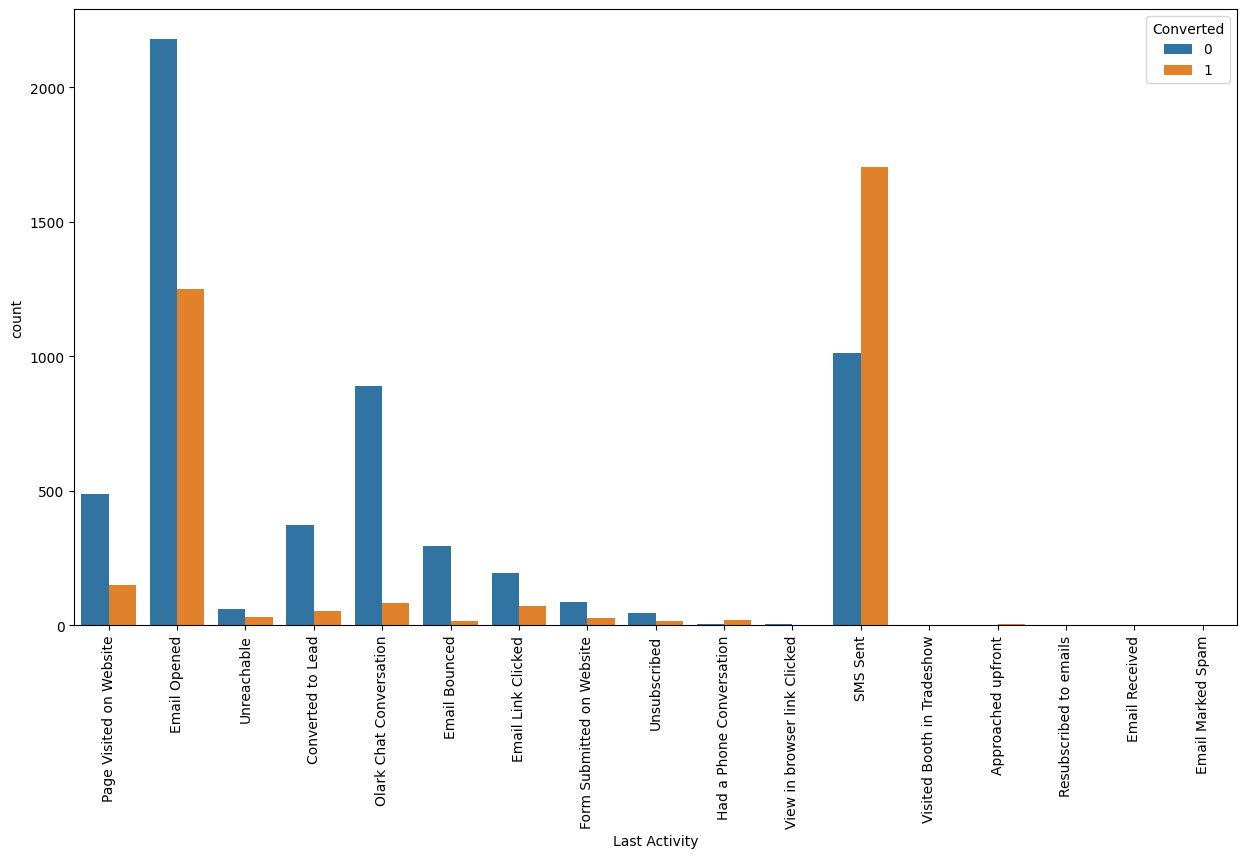

In [219]:
# Checking for Last Activity
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x='Last Activity', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

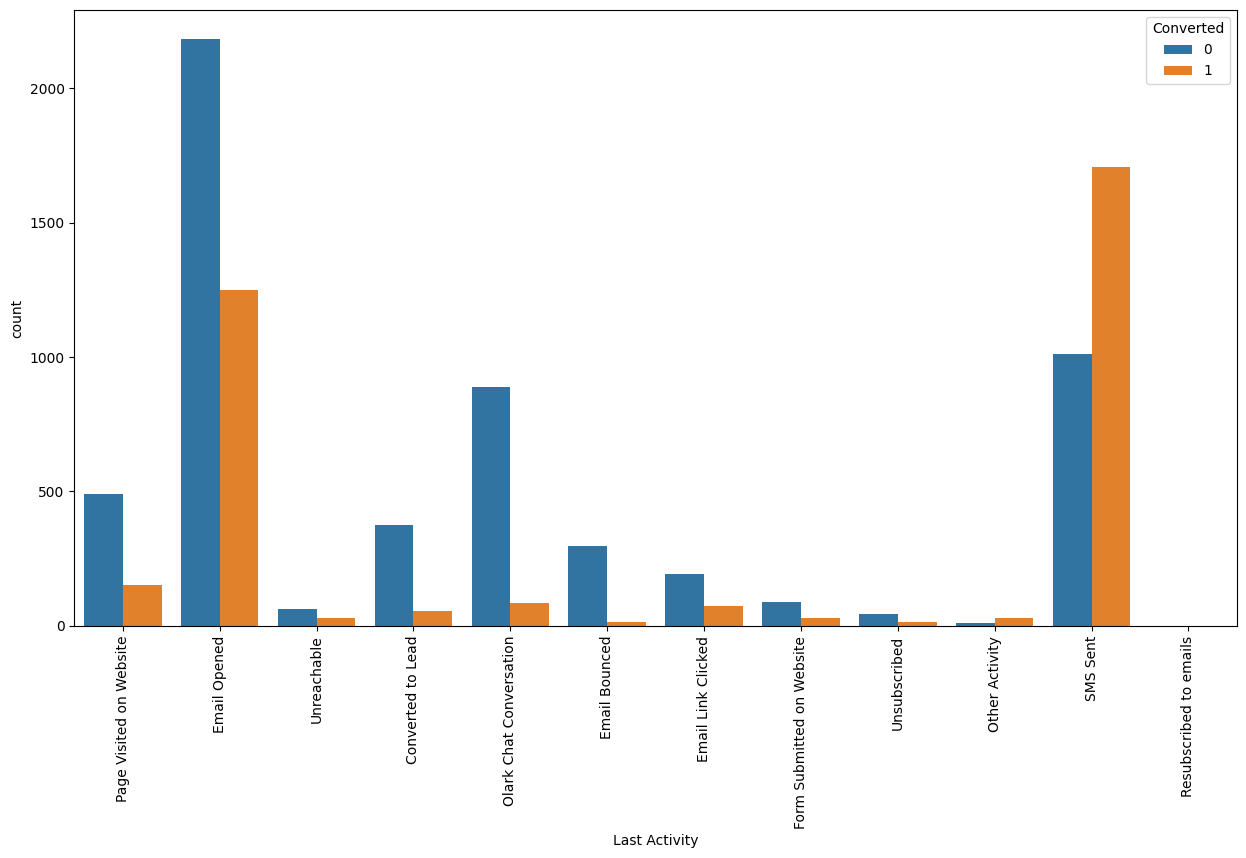

In [220]:
# We reduce the numbr of categories by the smaller volume data points to others
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation','Visited Booth in Tradeshow','Approached upfront',
                                                   'View in browser link Clicked', 'Email Received', 'Email Marked Spam'],'Other Activity')
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x='Last Activity', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

Leads whose Last Activity is SMS Sent has high chances of Lead Conversion

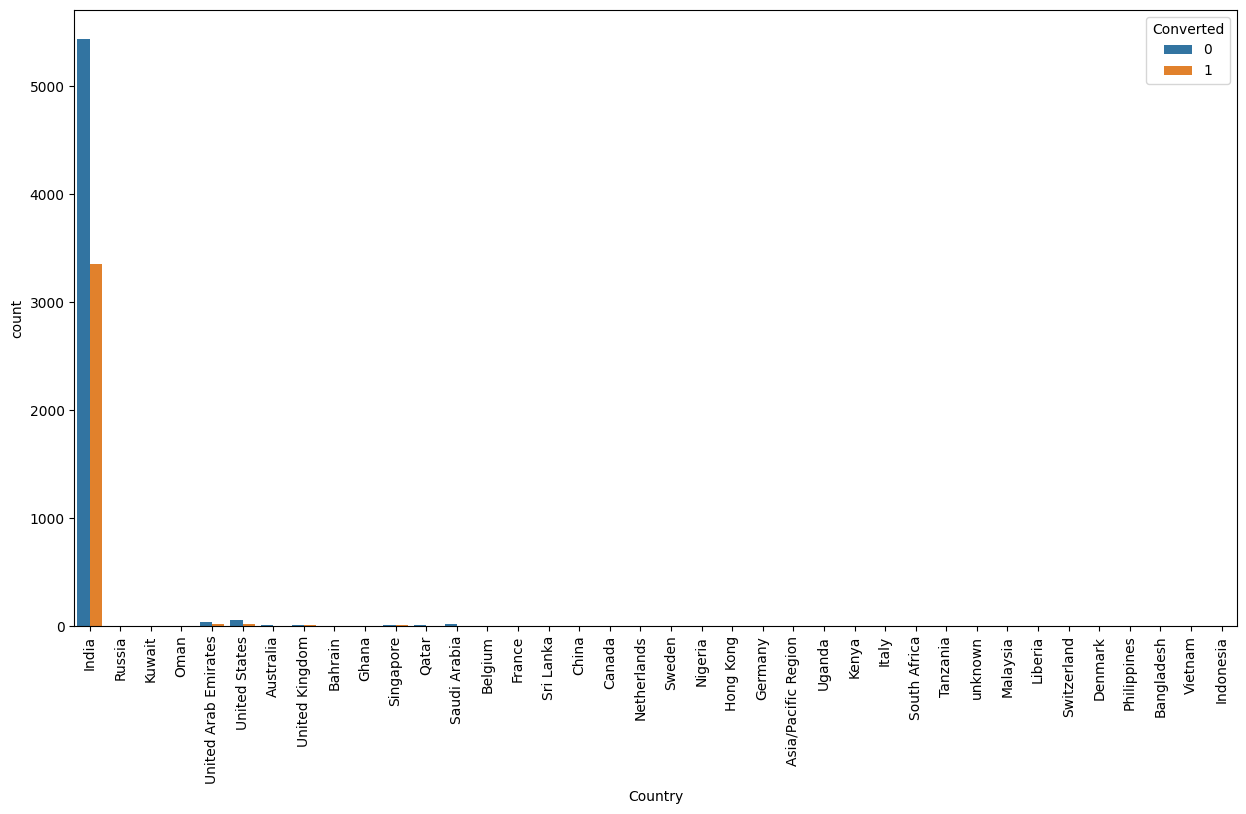

In [221]:
# Checking for Country
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x='Country', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

More than 90% Leads are from India, thus we cannot draw any conclusion from this attribute. Thus dropping this column.

In [222]:
df.drop('Country',axis=1,inplace=True)

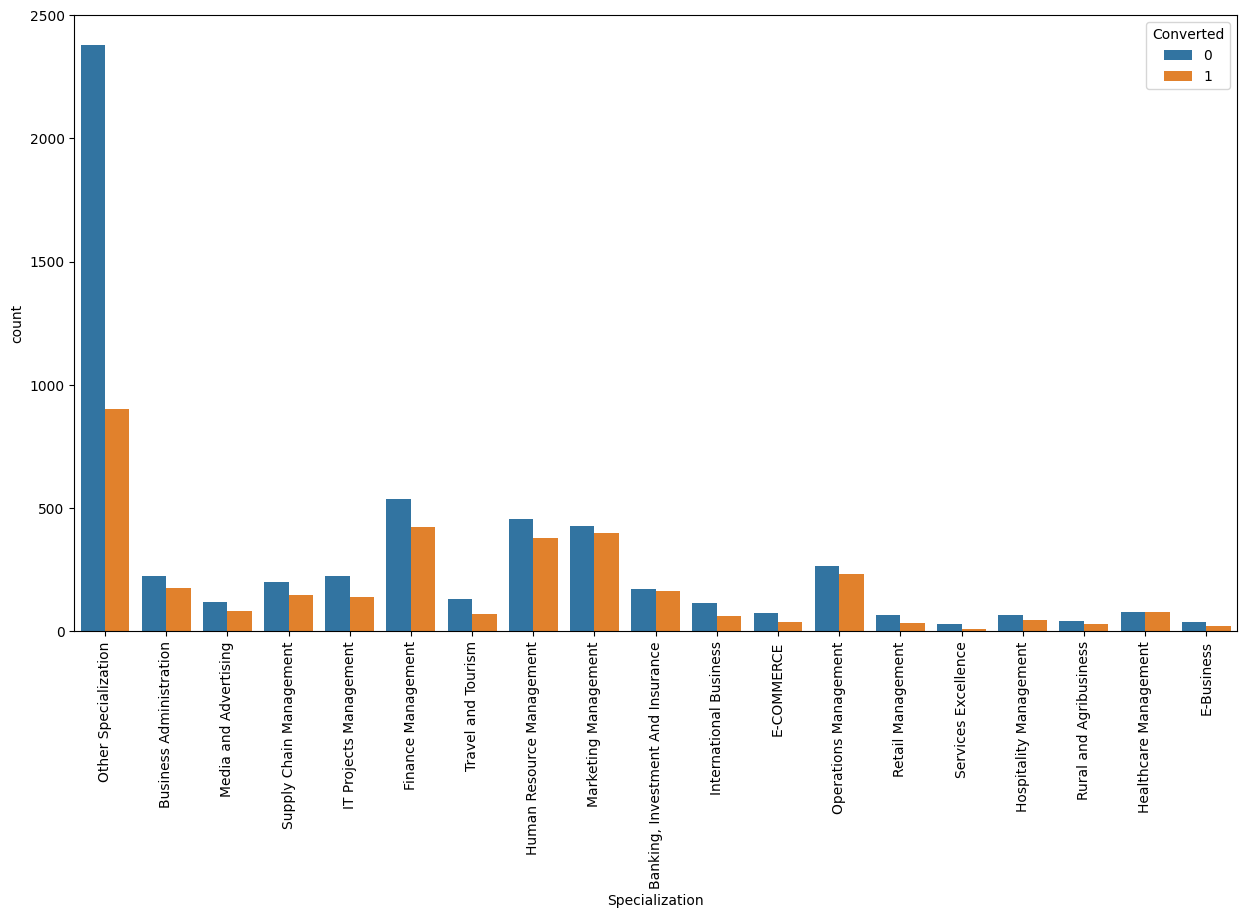

In [223]:
# Checking the next column Specialization
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x='Specialization', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

Many specializations have higher conversion rates than others like Marketing Management, Banking Insurance and Investment, etc.

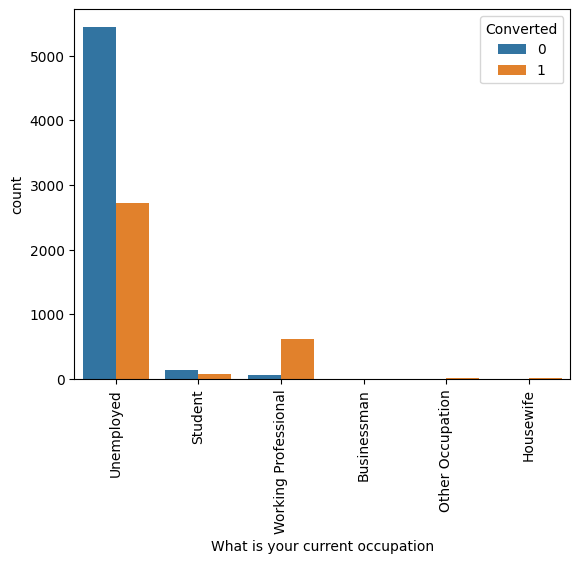

In [224]:
# Checking the next column, Current Occupation
df['What is your current occupation'].replace('Other','Other Occupation',inplace=True)
sns.countplot(x='What is your current occupation', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

Although unemployed leads are the highest number of converts in absolute terms but Working professionals have a higher conversion rate and are more likely to enroll compared to other occupation categories.

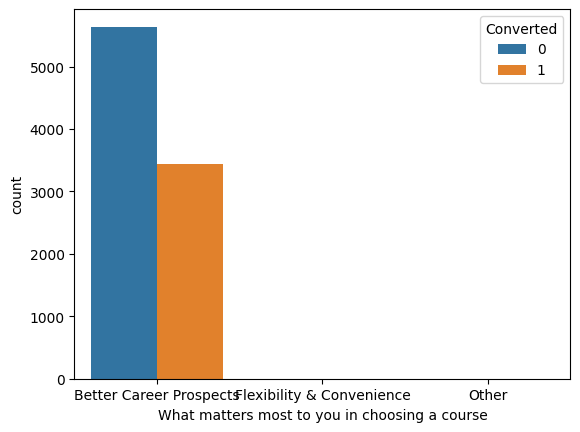

In [225]:
# Checking the next column 'What maters most to you in choosing a course'
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=df)
plt.show()

Most responses are Better Career Prospects thus we cannot draw any conclusion from this column. Thus dropping the column.

In [226]:
df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

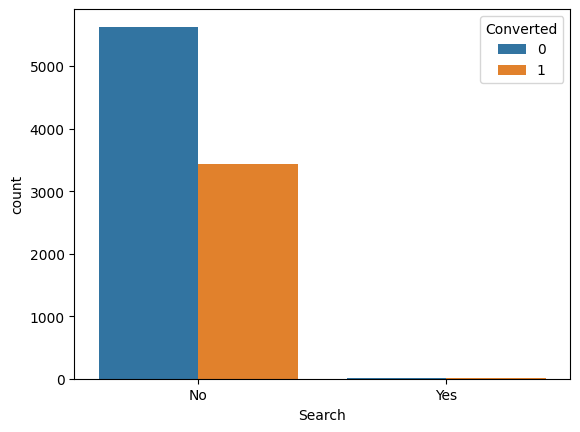

In [227]:
# Checking the next column, search
sns.countplot(x='Search', hue='Converted', data=df)
plt.show()

Most of the inputs are No. Thus we cannot draw any inference from the Search column. Thus dropping the column.

In [228]:
df.drop('Search',axis=1,inplace=True)

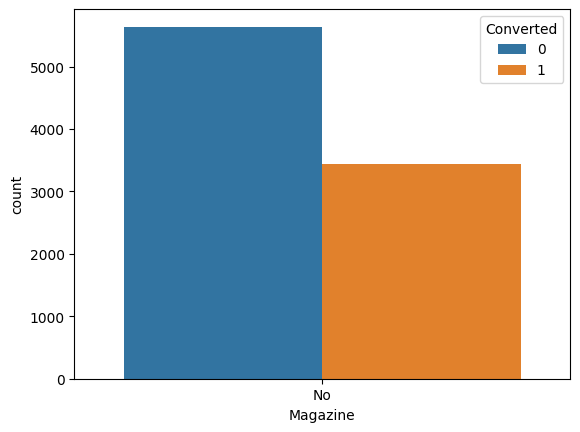

In [229]:
# Checking the next column, Magazine
sns.countplot(x='Magazine', hue='Converted', data=df)
plt.show()

All responses are No. No conclusion can be drawn from this column. Thus dropping the column.

In [230]:
df.drop('Magazine',axis=1,inplace=True)

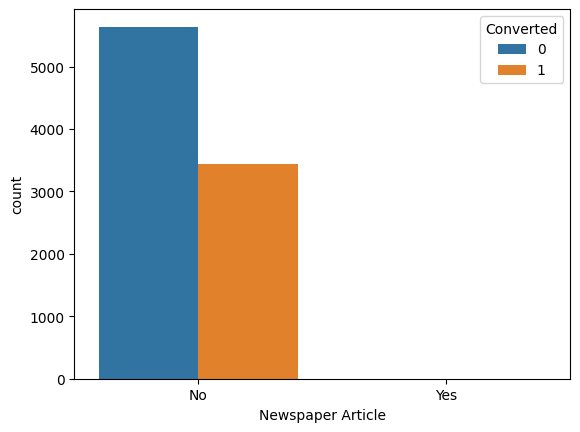

In [231]:
# Checking the next column, Newspaper Article
sns.countplot(x='Newspaper Article', hue='Converted', data=df)
plt.show()

All responses are No. We cannot draw any inference from this attribute. Thus dropping the column.

In [232]:
df.drop('Newspaper Article',axis=1,inplace=True)

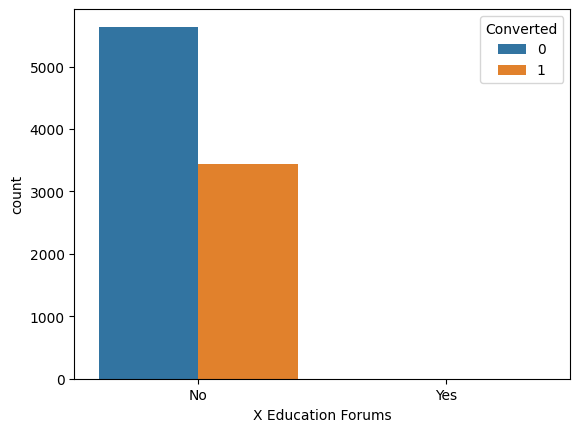

In [233]:
# Checking the next column, X Education Forums
sns.countplot(x='X Education Forums', hue='Converted', data=df)
plt.show()

All responses are No. We cannot draw any inference from this column. Thus dropping the column.

In [234]:
df.drop('X Education Forums',axis=1,inplace=True)

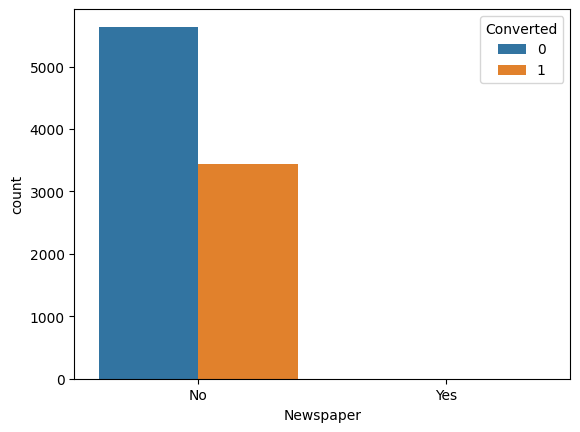

In [235]:
# Checking the next column, Newspaper
sns.countplot(x='Newspaper', hue='Converted', data=df)
plt.show()

All responses are No. We cannot draw an inference from this column. Thus dropping the column.

In [236]:
df.drop('Newspaper',axis=1,inplace=True)

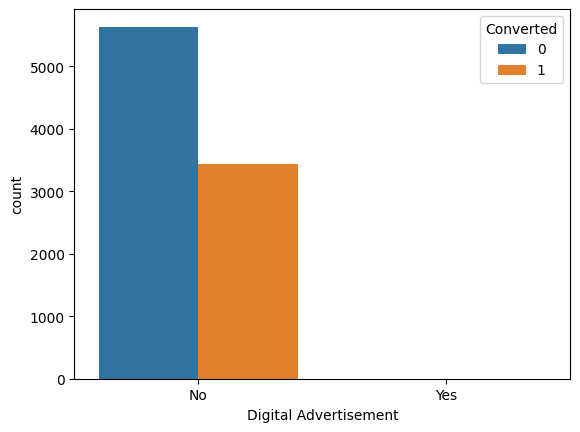

In [237]:
# Checking the next column, Digital Advertisement
sns.countplot(x='Digital Advertisement', hue='Converted', data=df)
plt.show()

All responses are No. We cannot draw an inference from this column. Thus dropping the column.

In [238]:
df.drop('Digital Advertisement',axis=1,inplace=True)

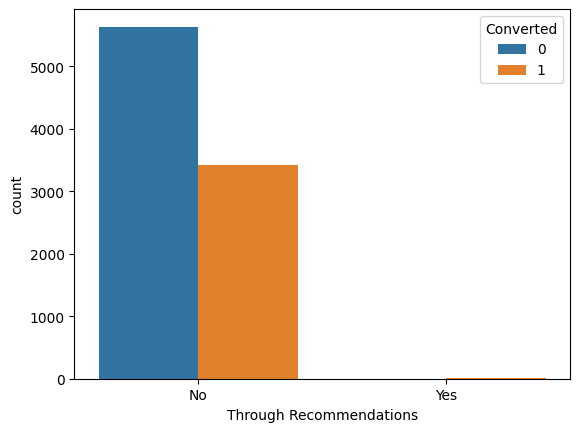

In [239]:
# Checking the next column, Through Recommendations
sns.countplot(x='Through Recommendations', hue='Converted', data=df)
plt.show()

Since most of the responses are No, we cannotdraw any inference from this column. Thus dropping the column.

In [240]:
df.drop('Through Recommendations',axis=1,inplace=True)

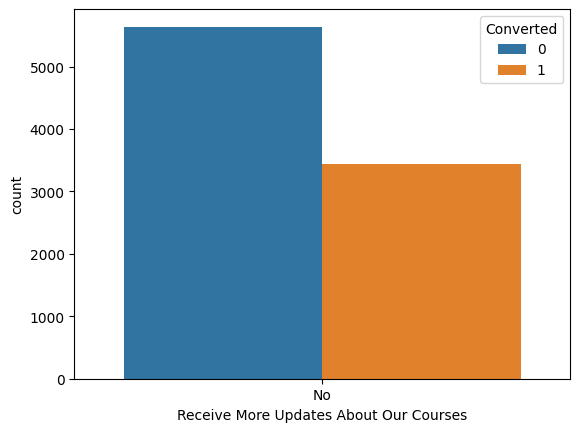

In [241]:
# Checking the next column, Receive More Updates About Our Courses
sns.countplot(x='Receive More Updates About Our Courses', hue='Converted', data=df)
plt.show()

All responses are No, thus we cannot drawany conclusion from this attribute, thus dropping this column.

In [242]:
df.drop('Receive More Updates About Our Courses',axis=1,inplace=True)

Wil lrevert back after reading email has very high conversion and looks like a key indicator of conversion. To reduce the complexity, we group the smaller volume data points into a single category.

Will revert after reading the email and Closed by Horizons are the target categories and needs further attention.

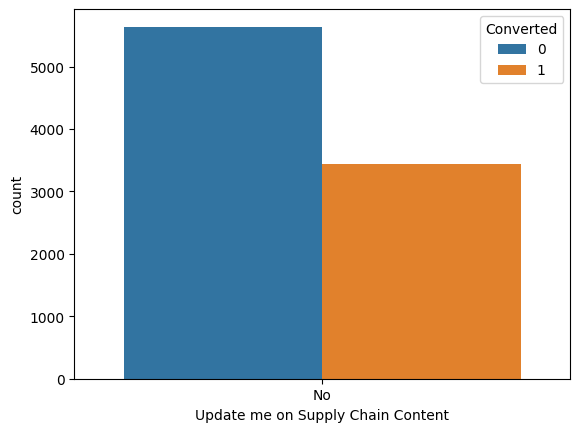

In [243]:
# Checking the next column, Update me on Supply Chain Content
sns.countplot(x='Update me on Supply Chain Content', hue='Converted', data=df)
plt.show()

Since all inputs are No, we cannot draw any inference from this column. Thus we drop this column.

In [244]:
df.drop('Update me on Supply Chain Content',axis=1,inplace=True)

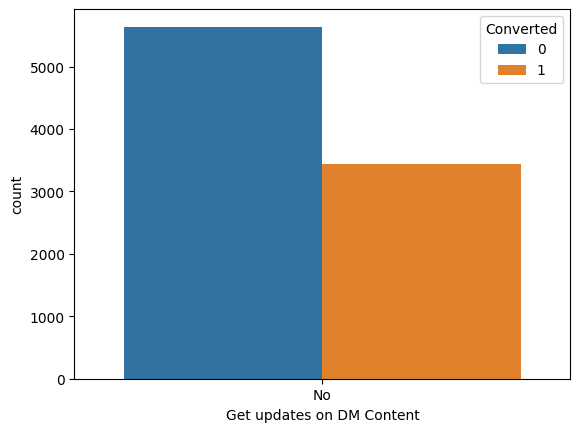

In [245]:
# Checking the next column, Update me on Supply Chain Content
sns.countplot(x='Get updates on DM Content', hue='Converted', data=df)
plt.show()

Since all inputs are No, we cannot draw any inference from this column. Thus we drop this column.

In [246]:
df.drop('Get updates on DM Content',axis=1,inplace=True)

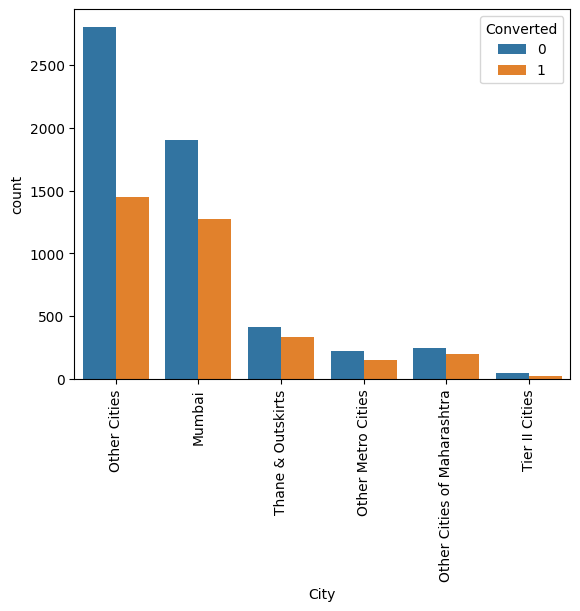

In [247]:
# Checking the next column, City
sns.countplot(x='City', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

1. Most Leads are from Mumbai with around 40%.
2. Conversion rates in other cities are also not bad, thus the marketing team must market the products in other cities as well.

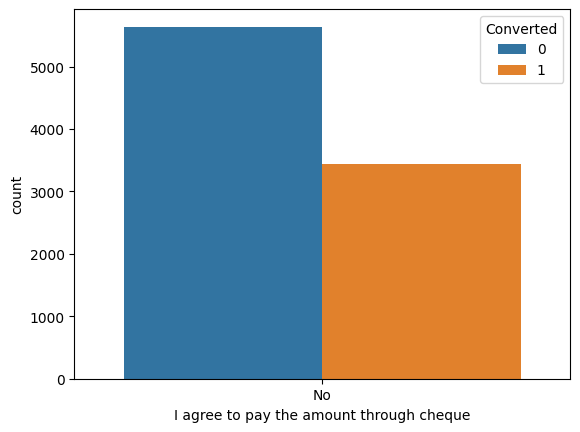

In [248]:
# Checking the next column, I agree to pay the amount through cheque
sns.countplot(x='I agree to pay the amount through cheque', hue='Converted', data=df)
plt.show()

Since all inputs are No, we cannot draw any inference from this column. Thus we drop this column.

In [249]:
df.drop('I agree to pay the amount through cheque',axis=1,inplace=True)

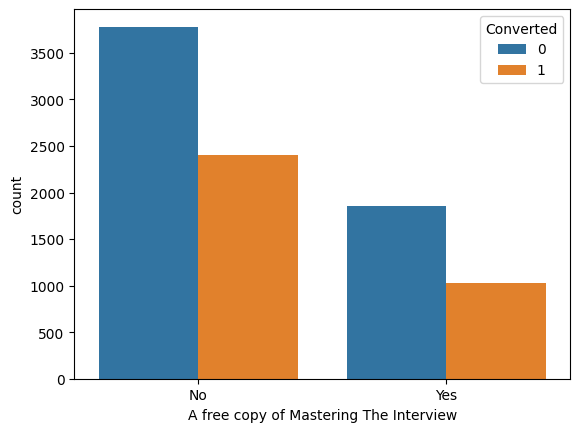

In [250]:
# Checking the next column, A free copy of Mastering The Interview
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=df)
plt.show()

There is no relation between Leads conversion and taking a free copy of a book. Thus dropping this column.

In [251]:
df.drop('A free copy of Mastering The Interview',axis=1,inplace=True)

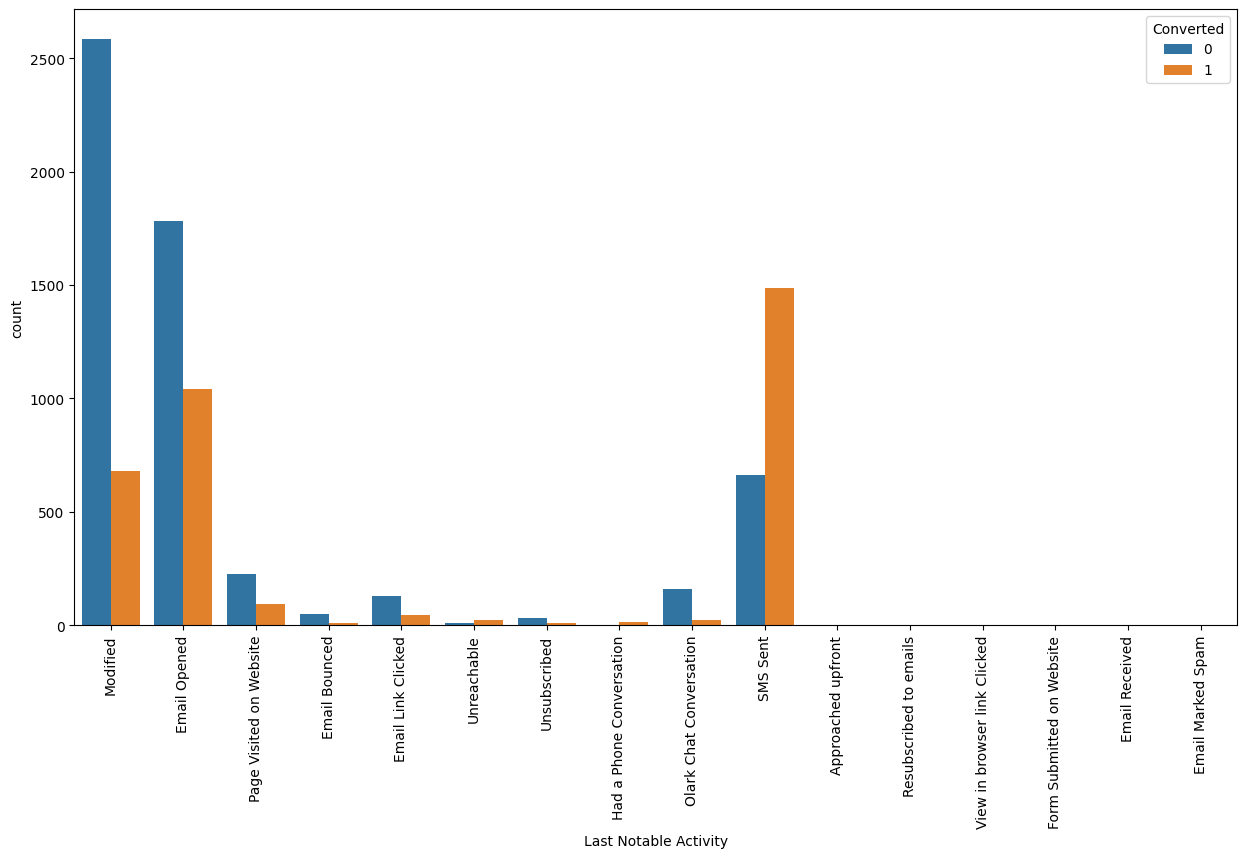

In [252]:
# Checking the last column, Last Notable Activity
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x='Last Notable Activity', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

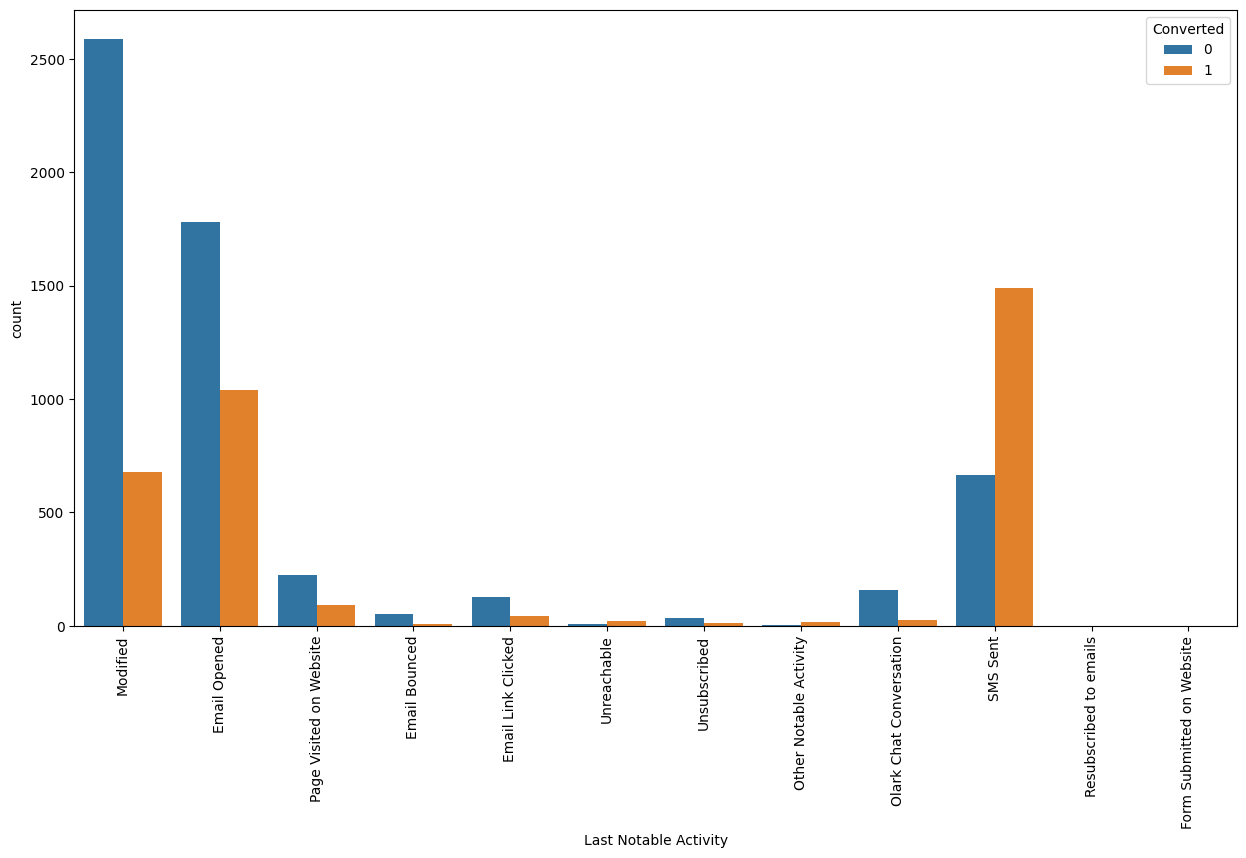

In [253]:
# We reduce the number of categories by the smaller volume data points to others
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation','Approached upfront','View in browser link Clicked', 'Email Received', 'Email Marked Spam'],'Other Notable Activity')
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x='Last Notable Activity', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

Just as Notable Activity, SMS Sent as Last Notable Activity has high conversion rates.

Based on the above analsysis, we saw that many attributes were not having any relation with out target column, thus we dropped them. We have dropped the below columns.
- Lead Number
- Country
- What matters most to you in choosing a course
- Search
- Magazine
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque
- A free copy of Mastering The Interview

In [254]:
#Checking the remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

#3. Data Preparation

In [255]:
# Converting the Yes/No values to 1 and 0
df['Do Not Email'] = df['Do Not Email'].map(lambda x: 1 if x == 'Yes' else 0)
df['Do Not Call'] = df['Do Not Call'].map(lambda x: 1 if x == 'Yes' else 0)

In [256]:
df['Do Not Email'].unique()

array([0, 1])

In [257]:
df['Do Not Call'].unique()

array([0, 1])

In [258]:
#Creating Dummy Variables
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'], axis = 1)
df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


#4. Train Test Split

In [259]:
# Seperating the Dataframe into Dependent and Independent attributes
X = df.drop(['Prospect ID','Converted'], axis=1)
y = df.pop('Converted')

In [260]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [261]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#5. Feature Scaling

In [263]:
# We do a MinMax scaling
scaler = MinMaxScaler()    #Instantiating the object
cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0.0,0.0,0.2,0.178347,0.333333,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1012,1.0,0.0,0.2,0.085355,0.333333,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9226,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4750,0.0,0.0,0.2,0.619946,0.333333,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7987,0.0,0.0,0.5,0.711590,0.416667,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


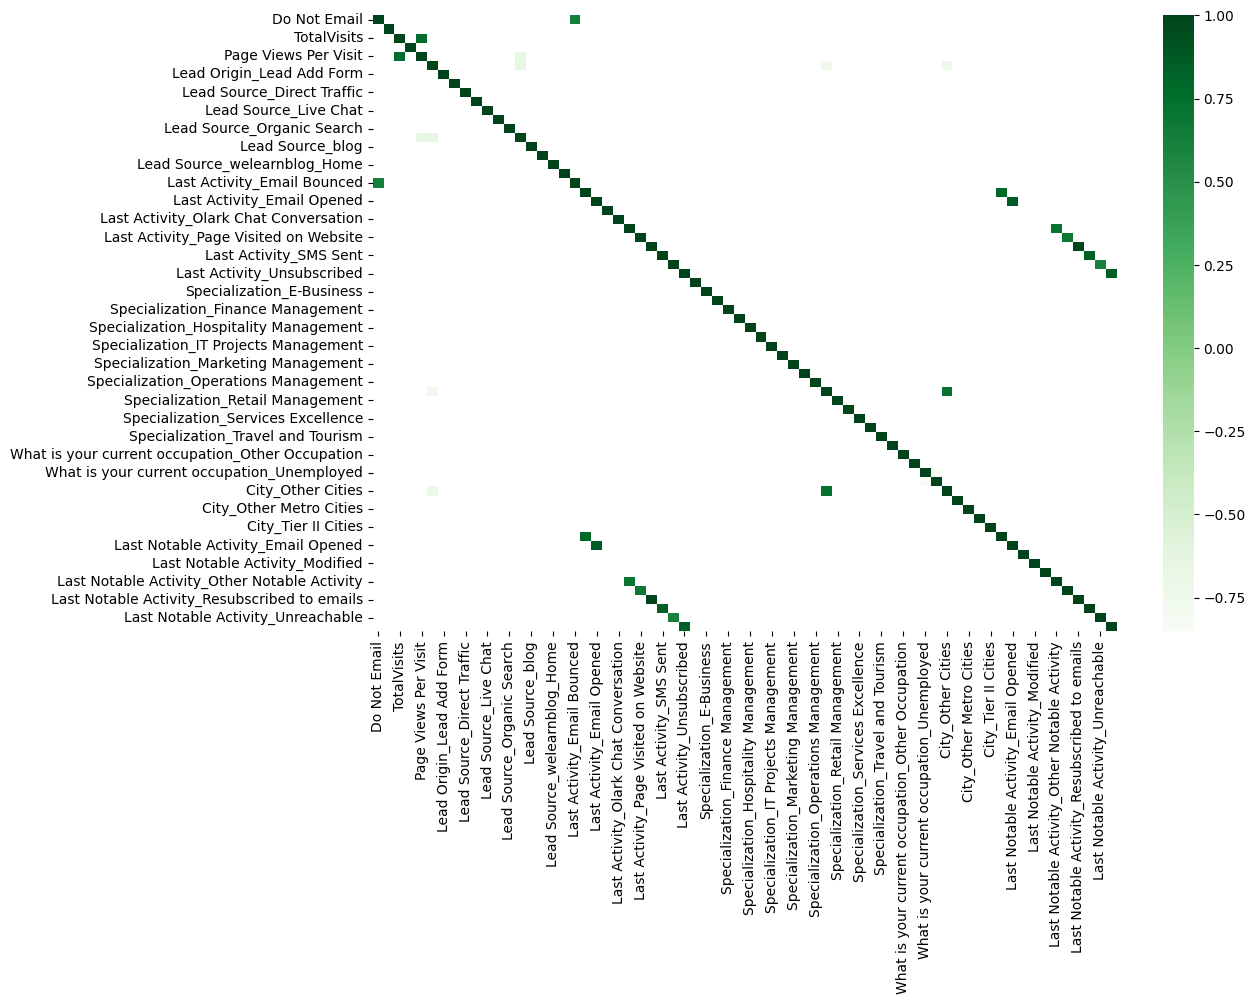

In [264]:
# Checking for Correlations
##We are emphasizing on correlation only in the range of more than equal to 0.6 and less than equal to (-0.6)
corr = X_train.corr()
corr1 = corr[abs(corr)>=.6]
plt.figure(figsize=(12,8))
sns.heatmap(corr1,cmap='Greens')
plt.show()

In [265]:
corr2 =  corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))  #To remove repetition and 1 correlations
corr_result = corr2.stack()
print(corr_result[(abs(corr_result) > 0.6)])

Do Not Email                                Last Activity_Email Bounced                             0.624939
TotalVisits                                 Page Views Per Visit                                    0.766735
Page Views Per Visit                        Lead Source_Other_Source                               -0.667925
Lead Origin_Landing Page Submission         Lead Source_Other_Source                               -0.639422
                                            Specialization_Other Specialization                    -0.753135
                                            City_Other Cities                                      -0.708444
Last Activity_Email Link Clicked            Last Notable Activity_Email Link Clicked                0.804444
Last Activity_Email Opened                  Last Notable Activity_Email Opened                      0.858361
Last Activity_Other Activity                Last Notable Activity_Other Notable Activity            0.716833
Last Activity_Page 

As we can clearly see from the correlation matrix with a threshold of 0.6, Last Activity and Last Notable Activity are highly correlated and have a positive correlation.<br>Unemployed and Working professionals have a high negative correlation.
<br>
Since Last Activity and Last Notable Activity has high correlation, we drop the Last Notable activity column, i.e. their dummy columns and also What is your current occupation_Unemployed. We would have a more robust model if we move these corelated variables.

In [266]:
X_train.drop(['Last Notable Activity_Email Link Clicked','Last Notable Activity_Email Opened','Last Notable Activity_Other Notable Activity',
              'Last Notable Activity_Page Visited on Website','City_Other Cities','Last Notable Activity_Resubscribed to emails','Last Notable Activity_Unreachable','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent','What is your current occupation_Unemployed','Last Activity_Email Bounced','Page Views Per Visit'],axis=1,inplace=True)
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,...,What is your current occupation_Other Occupation,What is your current occupation_Student,What is your current occupation_Working Professional,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3009,0.0,0.0,0.2,0.178347,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1012,1.0,0.0,0.2,0.085355,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9226,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4750,0.0,0.0,0.2,0.619946,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7987,0.0,0.0,0.5,0.711590,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [267]:
X_train.shape

(6351, 56)

#6. Model Building

In [268]:
#We first create a model with all the available columns
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6294
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Tue, 26 Dec 2023   Deviance:                       5180.7
Time:                        17:30:33   Pearson chi2:                 6.75e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5311      1.390     -1.820      0.069      -5.256       0.194
Do Not Email                                            -1.4692      0.196     -7.504      0.000      -1.853      -1.085
Do Not Call                                             22.4437   5.55e+04      0.000      1.000   -1.09e+05    1.09e+05
TotalVisits                                              0.2764      0.166      1.666      0.096      -0.049       0.602
Total Time Spent on Website                              4.4473      0.167     26.671      0.000       4.120       4.774
Lead Origin_Landing Page Submission                     -0.9944      0.135     -7.355      0.000      -1.259      -0.729
Lead Origin_Lead Add Form                                2.8824      0.225     12.833      0.000       2.442       3.323
Lead Origin_Lead Import                                 -0.1042      0.480     -0.217      0.828      -1.044       0.836
Lead Source_Direct Traffic                               0.8120      1.371      0.592      0.554      -1.875       3.499
Lead Source_Google                                       1.0906      1.369      0.797      0.426      -1.592       3.773
Lead Source_Live Chat                                   22.6806   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                      24.7970   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Organic Search                               0.8867      1.373      0.646      0.518      -1.804       3.577
Lead Source_Other_Source                                 2.0609      1.363      1.512      0.131      -0.611       4.733
Lead Source_blog                                       -21.6833   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_google                                     -20.2338   3.54e+04     -0.001      1.000   -6.95e+04    6.94e+04
Lead Source_welearnblog_Home                           -21.3032   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_youtubechannel                             -21.0124   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Last Activity_Email Link Clicked                         0.1345      0.292      0.461      0.645      -0.437       0.706
Last Activity_Email Opened                               0.4548      0.213      2.138      0.033       0.038       0.872
Last Activity_Form Submitted on Website                  0.3282      0.389      0.844      0.399      -0.434       1.091
Last Activity_Olark Chat Conversation                   -0.4291      0.268     -1.603      0.109      -0.954       0.096
Last Activity_Other Activity                             2

In [269]:
#Getting the predicted values on the Train Set
y_train_pred = res1.predict(X_train_sm)
y_train_pred[:100]

3009    0.171327
1012    0.090620
9226    0.313775
4750    0.860202
7987    0.794885
          ...   
6016    0.227848
3335    0.037658
5926    0.213235
8631    0.496411
555     0.157047
Length: 100, dtype: float64

#7. Feature Selection using RFE
Since there are too many columns, we use RFE to choose the top 15 features for an understandable model.

In [270]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 6),
 ('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Google', False, 39),
 ('Lead Source_Live Chat', False, 18),
 ('Lead Source_NC_EDM', False, 5),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Other_Source', True, 1),
 ('Lead Source_blog', False, 15),
 ('Lead Source_google', False, 11),
 ('Lead Source_welearnblog_Home', False, 22),
 ('Lead Source_youtubechannel', False, 25),
 ('Last Activity_Email Link Clicked', False, 31),
 ('Last Activity_Email Opened', False, 14),
 ('Last Activity_Form Submitted on Website', False, 26),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 38),
 ('Last Activity_Resubscribed to email

In [271]:
#Columns within top 15
col = X_train.columns[rfe.support_]
print(col)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Other_Source', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Other Specialization',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other Occupation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified'],
      dtype='object')


In [272]:
#Eliminated Columns
print(X_train.columns[~rfe.support_])

Index(['Do Not Call', 'TotalVisits', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specializa

In [273]:
# Building the second model with 15 variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.9
Date:                Tue, 26 Dec 2023   Deviance:                       5231.7
Time:                        17:30:39   Pearson chi2:                 6.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3991
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1220      0.137     -8.216      0.000      -1.390      -0.854
Do Not Email                                            -1.6271      0.187     -8.721      0.000      -1.993      -1.261
Total Time Spent on Website                              4.4398      0.164     27.024      0.000       4.118       4.762
Lead Origin_Landing Page Submission                     -1.1117      0.128     -8.704      0.000      -1.362      -0.861
Lead Origin_Lead Add Form                                2.8665      0.219     13.083      0.000       2.437       3.296
Lead Source_Other_Source                                 0.9749      0.118      8.259      0.000       0.744       1.206
Last Activity_Olark Chat Conversation                   -0.8926      0.171     -5.217      0.000      -1.228      -0.557
Last Activity_Other Activity                             2.1626      0.471      4.595      0.000       1.240       3.085
Last Activity_SMS Sent                                   1.3394      0.075     17.786      0.000       1.192       1.487
Last Activity_Unreachable                                0.7753      0.312      2.483      0.013       0.163       1.387
Last Activity_Unsubscribed                               1.3188      0.485      2.721      0.007       0.369       2.269
Specialization_Other Specialization                     -1.0861      0.124     -8.736      0.000      -1.330      -0.842
What is your current occupation_Housewife               22.6885   1.51e+04      0.002      0.999   -2.95e+04    2.95e+04
What is your current occupation_Other Occupation         1.0154      0.754      1.346      0.178      -0.463       2.494
What is your current occupation_Working Professional     2.6096      0.195     13.412      0.000       2.228       2.991
Last Notable Activity_Modified                          -0.9206      0.081    -11.340      0.000      -1.080      -0.762
========================================================================================================================
"""

In [274]:
#Tags_invalid number given has a high P-Value,
col = col.drop('What is your current occupation_Housewife',1)
print(col)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Other_Source', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Other Specialization',
       'What is your current occupation_Other Occupation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified'],
      dtype='object')


In [275]:
# Building the model again with 14 variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.9
Date:                Tue, 26 Dec 2023   Deviance:                       5239.9
Time:                        17:30:39   Pearson chi2:                 6.83e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3983
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1140      0.136     -8.167      0.000      -1.381      -0.847
Do Not Email                                            -1.6292      0.187     -8.733      0.000      -1.995      -1.264
Total Time Spent on Website                              4.4367      0.164     27.034      0.000       4.115       4.758
Lead Origin_Landing Page Submission                     -1.1119      0.128     -8.716      0.000      -1.362      -0.862
Lead Origin_Lead Add Form                                2.8765      0.219     13.135      0.000       2.447       3.306
Lead Source_Other_Source                                 0.9732      0.118      8.247      0.000       0.742       1.205
Last Activity_Olark Chat Conversation                   -0.8936      0.171     -5.222      0.000      -1.229      -0.558
Last Activity_Other Activity                             2.1592      0.471      4.587      0.000       1.237       3.082
Last Activity_SMS Sent                                   1.3345      0.075     17.732      0.000       1.187       1.482
Last Activity_Unreachable                                0.7711      0.312      2.469      0.014       0.159       1.383
Last Activity_Unsubscribed                               1.3160      0.485      2.716      0.007       0.366       2.266
Specialization_Other Specialization                     -1.0906      0.124     -8.780      0.000      -1.334      -0.847
What is your current occupation_Other Occupation         1.0115      0.754      1.341      0.180      -0.467       2.490
What is your current occupation_Working Professional     2.6053      0.195     13.391      0.000       2.224       2.987
Last Notable Activity_Modified                          -0.9235      0.081    -11.382      0.000      -1.083      -0.765
========================================================================================================================
"""

In [276]:
# All the P-Values are below 0.05, which shows that the attributes are significant and plays a part in the prediction
# Now, we check the VIF to chck the correlation amoung the variables
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,Lead Source_Other_Source,2.58
10,Specialization_Other Specialization,2.32
2,Lead Origin_Landing Page Submission,2.24
1,Total Time Spent on Website,1.99
13,Last Notable Activity_Modified,1.79
7,Last Activity_SMS Sent,1.59
5,Last Activity_Olark Chat Conversation,1.57
3,Lead Origin_Lead Add Form,1.54
0,Do Not Email,1.21
12,What is your current occupation_Working Profes...,1.18


All the features have a VIF of less than 2.5. Taking 5 as the threshold, all the features can be kept in the model, since they are independent of each other.

In [277]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.192382
1012    0.123282
9226    0.305681
4750    0.865195
7987    0.792849
1281    0.744566
2880    0.098153
4971    0.962820
7536    0.847684
1248    0.762924
dtype: float64

In [278]:
# COnverting to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19238151, 0.12328209, 0.3056812 , 0.86519474, 0.79284884,
       0.7445662 , 0.09815323, 0.96281965, 0.84768402, 0.76292448])

In [279]:
#Creating a Dataframe with the actual lead conversion and predicted lead conversion
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.192382,3009
1,0,0.123282,1012
2,0,0.305681,9226
3,1,0.865195,4750
4,1,0.792849,7987


In [280]:
#Creating a new column, Predicted, with less than/equal 0.5 Converted probability as 0 and higher than 0.5 as 1. Intitially we
#take 0.5 as an arbitrary value just for analysis
y_train_pred_final['predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.192382,3009,0
1,0,0.123282,1012,0
2,0,0.305681,9226,0
3,1,0.865195,4750,1
4,1,0.792849,7987,1
5,1,0.744566,1281,1
6,0,0.098153,2880,0
7,1,0.962820,4971,1
8,1,0.847684,7536,1
9,0,0.762924,1248,1


In [281]:
#Evaluating the model
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
print(confusion)

[[3468  437]
 [ 726 1720]]


In [282]:
# Predicted       not_conv    conv
# Actual
# not_conv        3468        437
# conv            726         1720

In [283]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted']))

0.8168792316170682


We have a 91% prediction rate with our model logm3! We finalize logm3 as our final model.

In [284]:
# Lets take a look at some further metrics
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
Sensitivity = round(TP / float(TP+FN),2)
Specificity = round(TN / float(TN+FP),2)
FP_Rate = round(FP/ float(TN+FP),2)
PP_Value = round(TP / float(TP+FP),2)
NP_Value = round(TN / float(TN+ FN),2)
Precision = round(TP / float(TP+FP),2)
Recall = round(TP / float(TP+FN),2)
print('True Positives: ',TP)
print('True Negatives: ',TN)
print('False Positives: ',FP)
print('False Negatives: ',FN)
print('Sensitivity: ',Sensitivity )
print('Specificity: ',Specificity )
print('False Positive Rate: ', FP_Rate)
print('Positive Predictive Value: ', PP_Value)
print('Negative Predictive Value: ', NP_Value)
print('Precision: ',Precision)
print('Recall: ',Recall)

True Positives:  1720
True Negatives:  3468
False Positives:  437
False Negatives:  726
Sensitivity:  0.7
Specificity:  0.89
False Positive Rate:  0.11
Positive Predictive Value:  0.8
Negative Predictive Value:  0.83
Precision:  0.8
Recall:  0.7


#8. ROC Curve

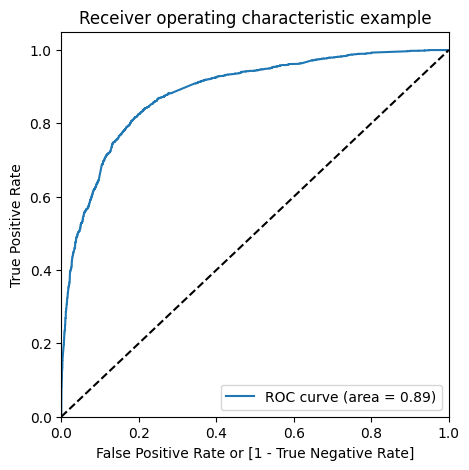

In [285]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'], drop_intermediate = False )
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

SCurve almost fits the Y Axis -->the model has very good prediction power.

#9. Optimal Cutoff Point

In [321]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,3009,0,0.192382,0,19.238151,1,1,0,0,0,0,0,0,0,0
1,1012,0,0.123282,0,12.328209,1,1,0,0,0,0,0,0,0,0
2,9226,0,0.305681,0,30.568120,1,1,1,1,0,0,0,0,0,0
3,4750,1,0.865195,1,86.519474,1,1,1,1,1,1,1,1,1,0
4,7987,1,0.792849,1,79.284884,1,1,1,1,1,1,1,1,0,0


     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.584003  0.974652  0.339309
0.2   0.2  0.742403  0.917007  0.633035
0.3   0.3  0.798929  0.854865  0.763892
0.4   0.4  0.815934  0.777187  0.840205
0.5   0.5  0.816879  0.703189  0.888092
0.6   0.6  0.798142  0.600572  0.921895
0.7   0.7  0.786805  0.528209  0.948784
0.8   0.8  0.762557  0.428046  0.972087
0.9   0.9  0.714848  0.278005  0.988476


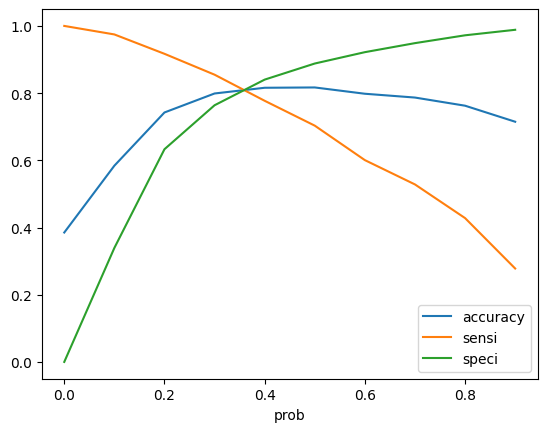

In [322]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

All probabilities beyond 0.1 cutoff has a good predictive power. The optimum point is at 0.39, thus we can take 0.39 as the cutoff probability.

In [327]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_prob'].map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head(15)

,Prospect ID,Converted,Converted_prob,final_predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,3009,0,0.192382,0,19.238151,1,1,0,0,0,0,0,0,0,0
1,1012,0,0.123282,0,12.328209,1,1,0,0,0,0,0,0,0,0
2,9226,0,0.305681,0,30.568120,1,1,1,1,0,0,0,0,0,0
3,4750,1,0.865195,1,86.519474,1,1,1,1,1,1,1,1,1,0
4,7987,1,0.792849,1,79.284884,1,1,1,1,1,1,1,1,0,0
5,1281,1,0.744566,1,74.456620,1,1,1,1,1,1,1,1,0,0
6,2880,0,0.098153,0,9.815323,1,0,0,0,0,0,0,0,0,0
7,4971,1,0.962820,1,96.281965,1,1,1,1,1,1,1,1,1,1
8,7536,1,0.847684,1,84.768402,1,1,1,1,1,1,1,1,1,0
9,1248,0,0.762924,1,76.292448,1,1,1,1,1,1,1,1,0,0


In [324]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

0.8118406550149583

In [325]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'] )
print(confusion2)

[[3158  747]
 [ 448 1998]]


In [291]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
Sensitivity = round(TP / float(TP+FN),2)
Specificity = round(TN / float(TN+FP),2)
FP_Rate = round(FP/ float(TN+FP),2)
PP_Value = round(TP / float(TP+FP),2)
NP_Value = round(TN / float(TN+ FN),2)
Precision = round(TP / float(TP+FP),2)
Recall = round(TP / float(TP+FN),2)
print('True Positives: ',TP)
print('True Negatives: ',TN)
print('False Positives: ',FP)
print('False Negatives: ',FN)
print('Sensitivity: ',Sensitivity )
print('Specificity: ',Specificity )
print('False Positive Rate: ', FP_Rate)
print('Positive Predictive Value: ', PP_Value)
print('Negative Predictive Value: ', NP_Value)
print('Precision: ',Precision)
print('Recall: ',Recall)

True Positives:  1998
True Negatives:  3158
False Positives:  747
False Negatives:  448
Sensitivity:  0.82
Specificity:  0.81
False Positive Rate:  0.19
Positive Predictive Value:  0.73
Negative Predictive Value:  0.88
Precision:  0.73
Recall:  0.82


The metrics remain almost the same for 0.35 as well.<br>

In [292]:
# Checking Precision and Recall using SKLearn utilities
print('Precision:',precision_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']))
print('Recall:',recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']))

Precision: 0.7278688524590164
Recall: 0.8168438266557645


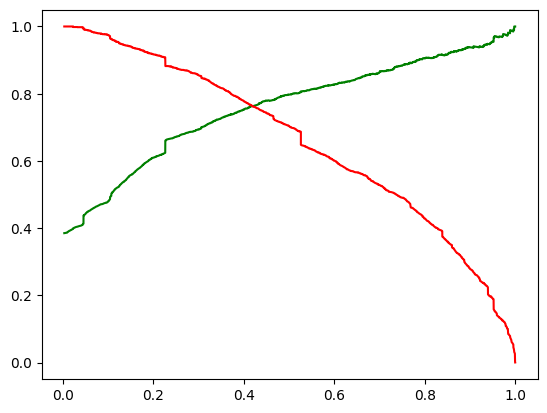

In [293]:
# Checking the Precision-Recall Tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The optimum point is around .4. Thus we keep our previous cutoff of 0.38 as the final cutoff probability.

In [294]:
y_train_pred_final = y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_predicted']]
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,final_predicted
0,0,0.192382,3009,0
1,0,0.123282,1012,0
2,0,0.305681,9226,0
3,1,0.865195,4750,1
4,1,0.792849,7987,1


In [295]:
y_train_pred_final.shape

(6351, 4)

#10. Making prediction on the test set

In [296]:
# We have to scale the test set, but only transform and not fit_transform. We fit only on the train dataset
cols = X_test.columns
X_test[cols] = scaler.transform(X_test[cols])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0.0,0.0,0.4,0.070530,0.666667,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1490,0.0,0.0,0.5,0.679695,0.833333,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7936,0.0,0.0,0.2,0.033243,0.333333,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4216,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3830,0.0,0.0,0.8,0.073675,1.000000,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [297]:
X_test.drop(['Last Notable Activity_Email Link Clicked','Last Notable Activity_Email Opened','Last Notable Activity_Other Notable Activity',
              'Last Notable Activity_Page Visited on Website','City_Other Cities','Last Notable Activity_Resubscribed to emails','Last Notable Activity_Unreachable','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent','What is your current occupation_Unemployed','Last Activity_Email Bounced','Page Views Per Visit'],axis=1,inplace=True)


In [298]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Other_Source,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Other Specialization,What is your current occupation_Other Occupation,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0.0,0.070530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1490,0.0,0.679695,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7936,0.0,0.033243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4216,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3830,0.0,0.073675,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [299]:
# making prediction on the test set
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.131061
1490    0.967549
7936    0.113343
4216    0.859627
3830    0.130220
1800    0.629694
6507    0.346536
4821    0.295970
4223    0.951645
4714    0.305681
dtype: float64

In [300]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.131061
1490,0.967549
7936,0.113343
4216,0.859627
3830,0.130220


In [301]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

In [302]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.131061
1,1,1490,0.967549
2,0,7936,0.113343
3,1,4216,0.859627
4,0,3830,0.130220


In [303]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [304]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.131061
1,1,1490,0.967549
2,0,7936,0.113343
3,1,4216,0.859627
4,0,3830,0.130220


In [305]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.131061,0
1,1,1490,0.967549,1
2,0,7936,0.113343,0
3,1,4216,0.859627,1
4,0,3830,0.130220,0


In [306]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_predicted']),2)

0.81

In [307]:
# Checking other metrics
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'] )
confusion3

array([[1405,  329],
       [ 194,  795]])

In [308]:
TP = confusion3[1,1] # true positive
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives
Sensitivity = round(TP / float(TP+FN),2)
Specificity = round(TN / float(TN+FP),2)
FP_Rate = round(FP/ float(TN+FP),2)
PP_Value = round(TP / float(TP+FP),2)
NP_Value = round(TN / float(TN+ FN),2)
Precision = round(TP / float(TP+FP),2)
Recall = round(TP / float(TP+FN),2)
print('True Positives: ',TP)
print('True Negatives: ',TN)
print('False Positives: ',FP)
print('False Negatives: ',FN)
print('Sensitivity: ',Sensitivity )
print('Specificity: ',Specificity )
print('False Positive Rate: ', FP_Rate)
print('Positive Predictive Value: ', PP_Value)
print('Negative Predictive Value: ', NP_Value)
print('Precision: ',Precision)
print('Recall: ',Recall)

True Positives:  795
True Negatives:  1405
False Positives:  329
False Negatives:  194
Sensitivity:  0.8
Specificity:  0.81
False Positive Rate:  0.19
Positive Predictive Value:  0.71
Negative Predictive Value:  0.88
Precision:  0.71
Recall:  0.8


#11. Assigning a Lead Score based on the Model

In [309]:
# Assigning a Lead Score to the Train Dataset
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,final_predicted
0,0,0.192382,3009,0
1,0,0.123282,1012,0
2,0,0.305681,9226,0
3,1,0.865195,4750,1
4,1,0.792849,7987,1


In [310]:
y_train_pred_final['Lead Score'] = y_train_pred_final['Converted_prob'] * 100

In [311]:
y_train_pred_final = y_train_pred_final[['Prospect ID', 'Converted', 'Converted_prob', 'final_predicted','Lead Score']]
y_train_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead Score
0,3009,0,0.192382,0,19.238151
1,1012,0,0.123282,0,12.328209
2,9226,0,0.305681,0,30.568120
3,4750,1,0.865195,1,86.519474
4,7987,1,0.792849,1,79.284884


In [312]:
y_train_pred_final.shape

(6351, 5)

In [313]:
# Assigning Lead Score to test dataset
y_pred_final['Lead Score'] = y_pred_final['Converted_prob'] * 100
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted,Lead Score
0,0,3271,0.131061,0,13.106079
1,1,1490,0.967549,1,96.754948
2,0,7936,0.113343,0,11.334267
3,1,4216,0.859627,1,85.962652
4,0,3830,0.130220,0,13.022036


In [314]:
y_test_pred_final = y_pred_final[['Prospect ID', 'Converted', 'Converted_prob', 'final_predicted','Lead Score']]
y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead Score
0,3271,0,0.131061,0,13.106079
1,1490,1,0.967549,1,96.754948
2,7936,0,0.113343,0,11.334267
3,4216,1,0.859627,1,85.962652
4,3830,0,0.130220,0,13.022036


In [315]:
y_test_pred_final.shape

(2723, 5)

In [316]:
final_df_lead_score = pd.concat([y_train_pred_final,y_test_pred_final],axis=0)
final_df_lead_score = final_df_lead_score.set_index('Prospect ID')
final_df_lead_score.sort_index(inplace=True)
final_df_lead_score.head()

,Converted,Converted_prob,final_predicted,Lead Score
Prospect ID,,,,
0,0,0.103878,0,10.387785
1,0,0.297098,0,29.709775
2,1,0.695849,1,69.584906
3,0,0.145485,0,14.548522
4,1,0.198801,0,19.880132


In [317]:
final_df = pd.merge(df_leads, final_df_lead_score, how='inner', left_index=True, right_index=True)
final_df.drop('Converted_y',inplace=True,axis=1)
final_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted_x,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Converted_prob,final_predicted,Lead Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0.103878,0,10.387785
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0.297098,0,29.709775
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,0.695849,1,69.584906
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,02.Medium,01.High,13.0,17.0,No,No,Modified,0.145485,0,14.548522
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,02.Medium,01.High,15.0,18.0,No,No,Modified,0.198801,0,19.880132


Lead Score has ben assigned against each record. The Lead score would provide an indication to the marketing team if they should spend time on the lead or move ahead. This way it would optimise the lead conversion to a great extent.

In [318]:
#Generating the output file for the Sales team so that they can use it for their sales approach
final_df.to_csv('Final Result with Lead Score.csv',index=False)

#12. Feature importance of the final model

In [319]:
#Features and their co-efficients
res.params

const                                                  -1.113952
Do Not Email                                           -1.629247
Total Time Spent on Website                             4.436738
Lead Origin_Landing Page Submission                    -1.111936
Lead Origin_Lead Add Form                               2.876469
Lead Source_Other_Source                                0.973215
Last Activity_Olark Chat Conversation                  -0.893551
Last Activity_Other Activity                            2.159220
Last Activity_SMS Sent                                  1.334473
Last Activity_Unreachable                               0.771060
Last Activity_Unsubscribed                              1.316048
Specialization_Other Specialization                    -1.090584
What is your current occupation_Other Occupation        1.011500
What is your current occupation_Working Professional    2.605311
Last Notable Activity_Modified                         -0.923541
dtype: float64

In [320]:
feature_importance = res.params[1:]    #Ignoring the constant
feature_importance = 100.0 * (feature_importance / feature_importance.max())
top3 = feature_importance.sort_values(ascending=False)[:3]
feature_importance.sort_values(ascending=False)

Total Time Spent on Website                             100.000000
Lead Origin_Lead Add Form                                64.832962
What is your current occupation_Working Professional     58.721321
Last Activity_Other Activity                             48.666831
Last Activity_SMS Sent                                   30.077787
Last Activity_Unsubscribed                               29.662509
What is your current occupation_Other Occupation         22.798279
Lead Source_Other_Source                                 21.935381
Last Activity_Unreachable                                17.378989
Last Activity_Olark Chat Conversation                   -20.139830
Last Notable Activity_Modified                          -20.815764
Specialization_Other Specialization                     -24.580761
Lead Origin_Landing Page Submission                     -25.062014
Do Not Email                                            -36.721736
dtype: float64